## Advanced Manipulations with Pandas 

##### Imports

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##### Read in some Weather Data

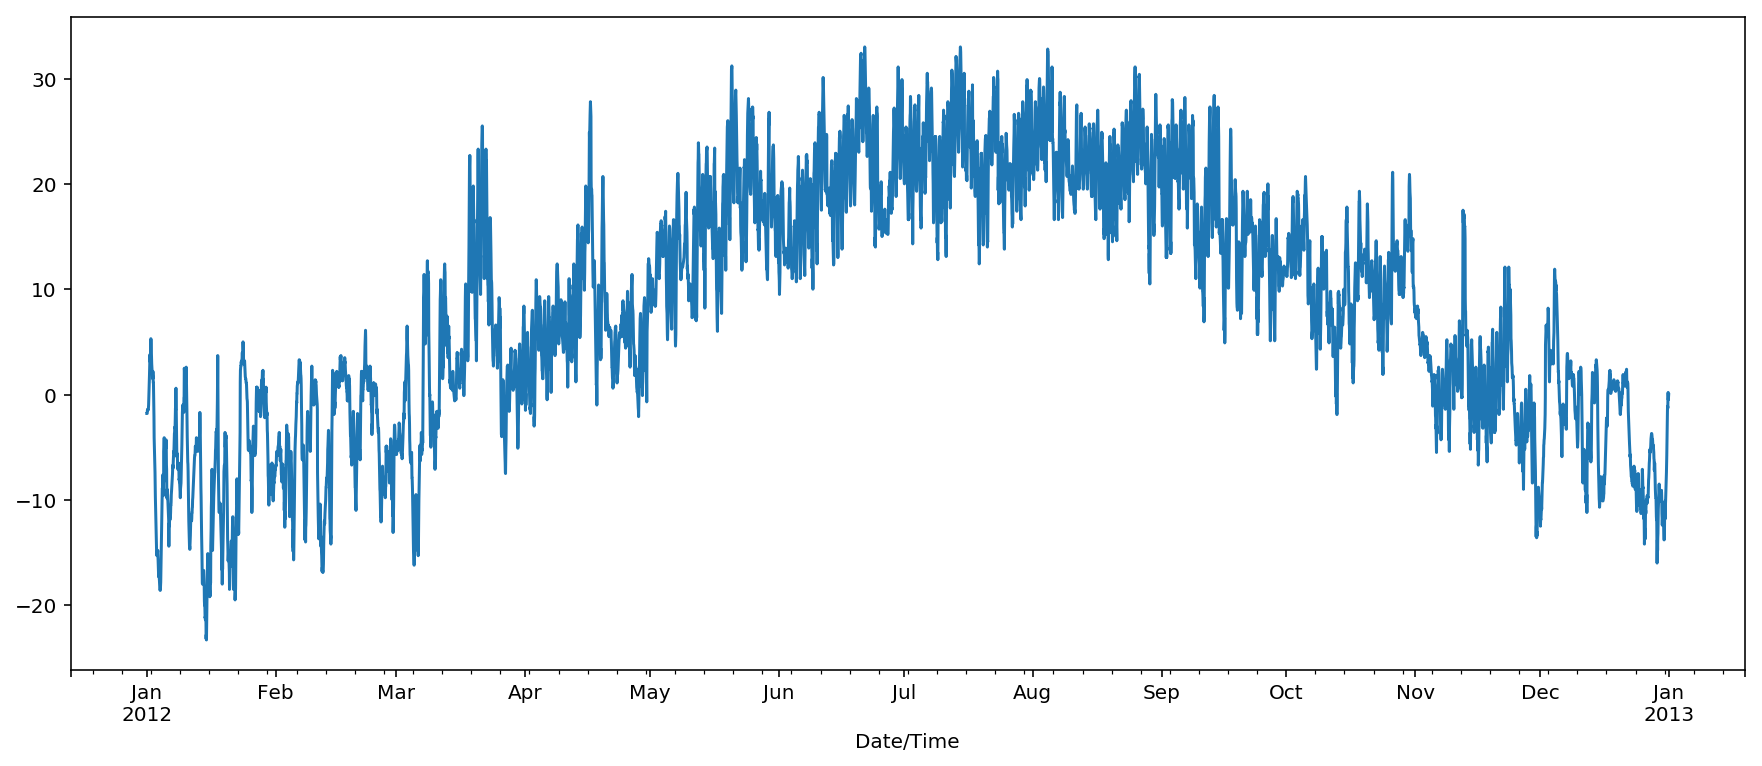

In [3]:
# Read it in, set the Date/Time as the index (we're going to build a time series!)
weather = pd.read_csv('../day2/data/weather.csv', parse_dates=['Date/Time'], index_col='Date/Time')
# Take a look
weather['Temp (C)'].plot(figsize=(15, 6));

In [4]:
# Examine the columns
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [4]:
# Examine some of the values
weather.head()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-01-01 00:00:00                4              8.0           101.24   
2012-01-01 01:00:00                4              8.0           101.24   
2012-01-01 02:00:00                7              4.0           101.26   
2012-01-01 03:00:00                6              4.0           101.27   
2012-01-01 04:00:00                7              4.8           101.23   

                                  Weather  
Date/Time                                  
2012-01-01 00:00:00                   Fog  
2012-01-01 01:00:00                   Fog  
2012-01-01 02:00:00  Freezing Drizzle,Fog  
2012-01-01 03:00:00  Freezing Drizzle,Fog  
2012-01-01 04:00:00                   Fog

In [11]:
weather.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [12]:
def get_fog(string):
    value = 'Fog' in string
    return value

string1 = 'Sunny day'
string2 = 'Fog day'
string3 = 'Real Foggy'
string4 = 'Not Foggy'

print(get_fog(string1))
print(get_fog(string2))
print(get_fog(string3))
print(get_fog(string4))

df = weather.copy()

False
True
True
True


In [92]:
weather['Fog'] = weather.Weather.apply(get_fog)

In [16]:
df.tail()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           93   
2012-12-31 22:00:00      -0.2                -1.8           89   
2012-12-31 23:00:00       0.0                -2.1           86   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-12-31 19:00:00               30              9.7           100.13   
2012-12-31 20:00:00               24              9.7           100.03   
2012-12-31 21:00:00               28              4.8            99.95   
2012-12-31 22:00:00               28              9.7            99.91   
2012-12-31 23:00:00               30             11.3            99.89   

                    Weather    Fog  
Date/Time                           
2012-12-31 19:00:00    Snow  False  
2012-12-31 20:00:00    Snow  False  
2012-12-31 21:00:00    Snow  False  
2012-12-31 22:00:00    Snow  False  
2012-12-31 23:00:00    Snow  False

### Applying Functions Across `Series` or `Dataframe`
Often times we'll want to update a series or Dataframe by applying functions to all of the values in a column or columns.  There are 3 main functions for doing this: `map()`, `apply()`, and `applymap()`.

**`map()`**  
Run a function on every element in a **`Series`**.  For instance, let's try converting temperature to Fahrenheit and adding that column:

In [28]:
# Function that converts Celsius to Fahrenheit
def celsius_to_fahrenheit(temp):
    return (9.0*temp/5.0) + 32

# Use it to make the conversion and add a new column for it
t1 = time.time()
for i in range(100):
    df['Temp (F)'] = df['Temp (C)'].map(celsius_to_fahrenheit)
print('took ', time.time()-t1, ' seconds')

df.head(10)

took  0.35197019577026367  seconds


Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   
2012-01-01 05:00:00      -1.4                -3.3           87   
2012-01-01 06:00:00      -1.5                -3.1           89   
2012-01-01 07:00:00      -1.4                -3.6           85   
2012-01-01 08:00:00      -1.4                -3.6           85   
2012-01-01 09:00:00      -1.3                -3.1           88   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-01-01 00:00:00                4              8.0           101.24   
2012-01-01 01:00:00                4              8.0           101.24   
2012-01-01 02:00:00                7              4.0           101.26   
2012-01-01 03:00:00                6              4.0           101.27   
2012-01-01 04:00:00                7              4.8           101.23   
2012-01-01 05:00:00                9              6.4           101.27   
2012-01-01 06:00:00                7              6.4           101.29   
2012-01-01 07:00:00                7              8.0           101.26   
2012-01-01 08:00:00                9              8.0           101.23   
2012-01-01 09:00:00               15              4.0           101.20   

                                  Weather   Fog  Temp (F)  
Date/Time                                                  
2012-01-01 00:00:00                   Fog  True     28.76  
2012-01-01 01:00:00                   Fog  True     28.76  
2012-01-01 02:00:00  Freezing Drizzle,Fog  True     28.76  
2012-01-01 03:00:00  Freezing Drizzle,Fog  True     29.30  
2012-01-01 04:00:00                   Fog  True     29.30  
2012-01-01 05:00:00                   Fog  True     29.48  
2012-01-01 06:00:00                   Fog  True     29.30  
2012-01-01 07:00:00                   Fog  True     29.48  
2012-01-01 08:00:00                   Fog  True     29.48  
2012-01-01 09:00:00                   Fog  True     29.66

In [18]:
celsius_to_fahrenheit(-6)

21.2

##### Lambda Functions
Often we won't want to explicitly write out the function definition for something like this because we'll just use it once and never again.  This is where "throwaway" or "temp" functions come in with the `lambda` operator.  Here's how you would do the same task with a `lambda`:

In [29]:
import time
t1 = time.time()
for i in range(100):
    weather['Temp (F)'] = weather['Temp (C)'].map(lambda x: 9.0*x/5.0 + 32)
print('took ', time.time()-t1, ' seconds')
#weather.head(10)

took  0.33841753005981445  seconds


**`apply()`**  
This is for functions that operate on entire arrays (`Series`) within a `Dataframe`.  Examples would include your usual aggregation functions like `sum()`, `mean()`, etc.  Here for example is how we might use it to find the range for each numeric column:

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
Temp (F)              8784 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 617.6+ KB


In [31]:
# Select only temperature columns and find their range
weather_temps = df[['Temp (C)', 'Temp (F)']]
weather_temps.apply(lambda x: x.max() - x.min())

Temp (C)     56.30
Temp (F)    101.34
dtype: float64

**`applymap`**  
This does element-wise operations on everything in a **`Dataframe`**:

In [36]:
# Function to format numerics
def format_numeric(x):
    return float('%.2f' % x)


weather_temps.applymap(format_numeric).dtypes

Temp (C)    float64
Temp (F)    float64
dtype: object

#### String Operators
`map`, `apply`, and `applymap` are general and allow you to write just about any function to apply to elements in dataframes.  However, `pandas` has a bunch of its own built-in functions for these things, especially when working with strings.

The `Weather` column is our only string here, so let's use it to look at some string operators.  First let's check out the unique values in there:

In [37]:
weather.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

**`replace()`**  
Just to demonstrate, let's replace all of the occurrences of "Fog" with "^Fog":

In [38]:
my_string = 'I am a string'
my_string = my_string.replace('string', 'panda')
print(my_string)

I am a panda


In [45]:
caret_fog = weather.Weather.str.replace('fun!', 'Snow')
caret_fog.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

Now let's undo our work with `replace()` to remove the caret sign:

In [47]:
caret_fog.str.replace('^','')

Date/Time
2012-01-01 00:00:00                     Fog
2012-01-01 01:00:00                     Fog
2012-01-01 02:00:00    Freezing Drizzle,Fog
2012-01-01 03:00:00    Freezing Drizzle,Fog
2012-01-01 04:00:00                     Fog
2012-01-01 05:00:00                     Fog
2012-01-01 06:00:00                     Fog
2012-01-01 07:00:00                     Fog
2012-01-01 08:00:00                     Fog
2012-01-01 09:00:00                     Fog
2012-01-01 10:00:00                     Fog
2012-01-01 11:00:00                     Fog
2012-01-01 12:00:00                     Fog
2012-01-01 13:00:00                     Fog
2012-01-01 14:00:00                     Fog
2012-01-01 15:00:00                     Fog
2012-01-01 16:00:00           Mostly Cloudy
2012-01-01 17:00:00                  Cloudy
2012-01-01 18:00:00                    Rain
2012-01-01 19:00:00                    Rain
2012-01-01 20:00:00                  Cloudy
2012-01-01 21:00:00                  Cloudy
2012-01-01 22:00:00   

**`contains()`**  
Let's use this method to check if the Weather contains "Snow" and if it does store that is `is_snowing`:

In [103]:
is_snowing = weather.Weather.str.contains('Snow')
is_snowing.columns = ['is_snowing']
#print(is_snowing)
weather[is_snowing]

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-02 17:00:00      -2.1                -9.5           57   
2012-01-02 20:00:00      -5.6               -13.4           54   
2012-01-02 21:00:00      -5.8               -12.8           58   
2012-01-02 23:00:00      -7.4               -14.1           59   
2012-01-03 00:00:00      -9.0               -16.0           57   
2012-01-03 02:00:00     -10.5               -15.8           65   
2012-01-03 03:00:00     -11.3               -18.7           54   
2012-01-03 05:00:00     -12.9               -19.1           60   
2012-01-03 06:00:00     -13.3               -19.3           61   
2012-01-03 07:00:00     -14.0               -19.5           63   
2012-01-04 12:00:00     -13.7               -21.7           51   
2012-01-04 14:00:00     -11.3               -19.0           53   
2012-01-04 15:00:00     -10.2               -16.3           61   
2012-01-04 16:00:00      -9.4               -15.5           61   
2012-01-04 17:00:00      -8.9               -13.2           71   
2012-01-04 18:00:00      -8.9               -12.6           75   
2012-01-04 19:00:00      -8.4               -12.7           71   
2012-01-04 20:00:00      -7.8               -12.1           71   
2012-01-04 21:00:00      -7.6               -11.6           73   
2012-01-04 22:00:00      -9.5               -12.7           77   
2012-01-04 23:00:00      -9.6               -12.6           79   
2012-01-05 00:00:00      -8.8               -11.7           79   
2012-01-05 01:00:00      -7.5               -10.2           81   
2012-01-05 02:00:00      -5.4                -8.3           80   
2012-01-05 03:00:00      -5.0                -7.7           81   
2012-01-05 04:00:00      -4.1                -6.5           83   
2012-01-05 05:00:00      -7.0                -9.5           82   
2012-01-05 06:00:00      -8.2               -10.7           82   
2012-01-05 07:00:00      -7.1                -9.7           82   
2012-01-05 08:00:00      -6.1                -9.1           79   
...                       ...                 ...          ...   
2012-12-29 18:00:00      -9.3               -10.9           88   
2012-12-29 19:00:00      -9.5               -11.2           87   
2012-12-29 20:00:00      -9.7               -11.6           86   
2012-12-29 21:00:00      -9.8               -11.8           85   
2012-12-29 22:00:00     -10.1               -11.6           89   
2012-12-29 23:00:00     -10.0               -12.0           85   
2012-12-30 00:00:00      -9.6               -11.3           87   
2012-12-30 01:00:00      -9.4               -10.5           92   
2012-12-30 02:00:00      -9.3               -10.4           92   
2012-12-30 03:00:00      -9.1               -10.4           90   
2012-12-30 04:00:00      -9.3               -10.6           90   
2012-12-30 05:00:00      -9.1               -10.4           90   
2012-12-30 06:00:00      -9.3               -10.8           89   
2012-12-31 07:00:00      -9.3               -11.3           85   
2012-12-31 08:00:00      -8.6               -10.3           87   
2012-12-31 09:00:00      -8.1                -9.6           89   
2012-12-31 10:00:00      -7.4                -8.9           89   
2012-12-31 11:00:00      -6.7                -7.9           91   
2012-12-31 12:00:00      -5.8                -7.5           88   
2012-12-31 13:00:00      -4.6                -6.6           86   
2012-12-31 14:00:00      -3.4                -5.7           84   
2012-12-31 15:00:00      -2.3                -4.6           84   
2012-12-31 16:00:00      -1.4                -4.0           82   
2012-12-31 17:00:00      -1.1                -3.3           85   
2012-12-31 18:00:00      -1.3                -3.1           88   
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           9

### Time Series  
As you're probably well aware by now, `pandas` can be indexed by datetimes without batting an eye.  Effectively, this means it handles **Time Series Data** out of the box!



**`date_range()`**  
Creates a `DateTimeIndex` which can index a time series.  This is especially useful if you don't already have one or want to make changes to one:

In [51]:
# Example date range with frequency specifier every 3 days, starting january 1st, for 6 cycles
dates = pd.date_range('20130101', periods=6, freq='3D')
dates



DatetimeIndex(['2013-01-01', '2013-01-04', '2013-01-07', '2013-01-10',
               '2013-01-13', '2013-01-16'],
              dtype='datetime64[ns]', freq='3D')

In [52]:
# Create a random dataframe with it
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

A         B         C         D
2013-01-01 -0.816653 -1.670171  0.732322 -0.406309
2013-01-04  0.440129  0.074633 -0.314185 -0.476340
2013-01-07 -1.618794 -1.381336 -0.400839  0.212598
2013-01-10  1.261351 -0.803709 -0.986185 -0.567945
2013-01-13  0.035489 -1.346270 -1.164478 -1.298388
2013-01-16  0.650090 -0.370242  0.765976  0.316645

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-04', '2013-01-07', '2013-01-10',
               '2013-01-13', '2013-01-16'],
              dtype='datetime64[ns]', freq='3D')

### Automatic Data Alignment by Index

In [54]:
df

A         B         C         D
2013-01-01 -0.816653 -1.670171  0.732322 -0.406309
2013-01-04  0.440129  0.074633 -0.314185 -0.476340
2013-01-07 -1.618794 -1.381336 -0.400839  0.212598
2013-01-10  1.261351 -0.803709 -0.986185 -0.567945
2013-01-13  0.035489 -1.346270 -1.164478 -1.298388
2013-01-16  0.650090 -0.370242  0.765976  0.316645

In [56]:
col1 = df.iloc[0:4,0]
col1

2013-01-01   -0.816653
2013-01-04    0.440129
2013-01-07   -1.618794
2013-01-10    1.261351
Freq: 3D, Name: A, dtype: float64

In [76]:
col2 = df.iloc[2:6,1]
col2

2013-01-07   -1.381336
2013-01-10   -0.803709
2013-01-13   -1.346270
2013-01-16   -0.370242
Freq: 3D, Name: B, dtype: float64

In [77]:
col3 = df.iloc[[0,1,3,5] , 2]
col3

2013-01-01    0.732322
2013-01-04   -0.314185
2013-01-10   -0.986185
2013-01-16    0.765976
Name: C, dtype: float64

In [87]:
df_new = pd.DataFrame({'AA':col1,
                       'BB':col2,
                       'CC':col3})

In [85]:
### How many rows will df_new have?
df_new

AA        BB        CC
Ed      -0.816653       NaN  0.732322
really   0.440129       NaN -0.314185
likes   -1.618794 -1.381336       NaN
to       1.261351 -0.803709 -0.986185
use           NaN -1.346270       NaN
strings       NaN -0.370242  0.765976

**`resample()`**  
Every datetime index has an inherent frequency.  For instance, in the example above the frequency was every 3 days.  The `resample()` method is so valuable in that it allows us to either **upsample** or **downsample** to change the frequency of the observations.  Upsampling involved getting more frequent observations--obviously this is limited by the total number that you have--but you can also potentially **interpolate** values for these new observations and `pandas` has methods for doing this.  In downsampling, you're simple reducing the observations down to the appropriate frequency.

Let's use resampling along with our `is_snowing` variable to determine the snowiest **month** (as opposed to the current data by day)!  When downsampling like this, you can specify parameters as to how to aggregate the observations being dropped.  Here we'll use the **mean**:

In [97]:
# What's happening here?
is_fogging = weather.Fog
is_snowing.astype(float).resample('y').apply('mean')

#is_snowing.astype(float).resample('M').apply('mean')

Date/Time
2012-12-31    0.048497
Freq: A-DEC, Name: Fog, dtype: float64

### Joining Related Datasets

**`merge()`**  
What if now we wanted to join together our `is_snowing` with the columns from `weather` so they're all alligned in the same Dataframe.  This is literally called a **join** in classical SQL (database query language) terms, and `pandas` has a few ways to accomplish it.  `merge` is the best, so let's start there:

In [105]:
is_snowing_df = pd.DataFrame(is_snowing)
is_snowing_df.columns = ['is_snowing']

In [118]:
# What's happening?
weather_snowing = weather.merge(pd.DataFrame(is_snowing), left_index=True, right_index=True)
weather_snowing.rename(columns={'Weather_y':'is_snowing'}, inplace=True)
weather_snowing

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   
2012-01-01 05:00:00      -1.4                -3.3           87   
2012-01-01 06:00:00      -1.5                -3.1           89   
2012-01-01 07:00:00      -1.4                -3.6           85   
2012-01-01 08:00:00      -1.4                -3.6           85   
2012-01-01 09:00:00      -1.3                -3.1           88   
2012-01-01 10:00:00      -1.0                -2.3           91   
2012-01-01 11:00:00      -0.5                -2.1           89   
2012-01-01 12:00:00      -0.2                -2.0           88   
2012-01-01 13:00:00       0.2                -1.7           87   
2012-01-01 14:00:00       0.8                -1.1           87   
2012-01-01 15:00:00       1.8                -0.4           85   
2012-01-01 16:00:00       2.6                -0.2           82   
2012-01-01 17:00:00       3.0                 0.0           81   
2012-01-01 18:00:00       3.8                 1.0           82   
2012-01-01 19:00:00       3.1                 1.3           88   
2012-01-01 20:00:00       3.2                 1.3           87   
2012-01-01 21:00:00       4.0                 1.7           85   
2012-01-01 22:00:00       4.4                 1.9           84   
2012-01-01 23:00:00       5.3                 2.0           79   
2012-01-02 00:00:00       5.2                 1.5           77   
2012-01-02 01:00:00       4.6                 0.0           72   
2012-01-02 02:00:00       3.9                -0.9           71   
2012-01-02 03:00:00       3.7                -1.5           69   
2012-01-02 04:00:00       2.9                -2.3           69   
2012-01-02 05:00:00       2.6                -2.3           70   
...                       ...                 ...          ...   
2012-12-30 18:00:00     -12.6               -16.0           76   
2012-12-30 19:00:00     -13.4               -16.5           77   
2012-12-30 20:00:00     -13.8               -16.5           80   
2012-12-30 21:00:00     -13.8               -16.5           80   
2012-12-30 22:00:00     -13.7               -16.3           81   
2012-12-30 23:00:00     -12.1               -15.1           78   
2012-12-31 00:00:00     -11.1               -14.4           77   
2012-12-31 01:00:00     -10.7               -14.0           77   
2012-12-31 02:00:00     -10.1               -13.4           77   
2012-12-31 03:00:00     -11.8               -14.4           81   
2012-12-31 04:00:00     -10.5               -12.8           83   
2012-12-31 05:00:00     -10.2               -12.4           84   
2012-12-31 06:00:00      -9.7               -11.7           85   
2012-12-31 07:00:00      -9.3               -11.3           85   
2012-12-31 08:00:00      -8.6               -10.3           87   
2012-12-31 09:00:00      -8.1                -9.6           89   
2012-12-31 10:00:00      -7.4                -8.9           89   
2012-12-31 11:00:00      -6.7                -7.9           91   
2012-12-31 12:00:00      -5.8                -7.5           88   
2012-12-31 13:00:00      -4.6                -6.6           86   
2012-12-31 14:00:00      -3.4                -5.7           84   
2012-12-31 15:00:00      -2.3                -4.6           84   
2012-12-31 16:00:00      -1.4                -4.0           82   
2012-12-31 17:00:00      -1.1                -3.3           85   
2012-12-31 18:00:00      -1.3                -3.1           88   
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           9

**`join()`**  
This is slightly different than `merge`, we prefer `merge`:

In [121]:
weather.join(is_snowing, how="inner", rsuffix='2')

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   
2012-01-01 05:00:00      -1.4                -3.3           87   
2012-01-01 06:00:00      -1.5                -3.1           89   
2012-01-01 07:00:00      -1.4                -3.6           85   
2012-01-01 08:00:00      -1.4                -3.6           85   
2012-01-01 09:00:00      -1.3                -3.1           88   
2012-01-01 10:00:00      -1.0                -2.3           91   
2012-01-01 11:00:00      -0.5                -2.1           89   
2012-01-01 12:00:00      -0.2                -2.0           88   
2012-01-01 13:00:00       0.2                -1.7           87   
2012-01-01 14:00:00       0.8                -1.1           87   
2012-01-01 15:00:00       1.8                -0.4           85   
2012-01-01 16:00:00       2.6                -0.2           82   
2012-01-01 17:00:00       3.0                 0.0           81   
2012-01-01 18:00:00       3.8                 1.0           82   
2012-01-01 19:00:00       3.1                 1.3           88   
2012-01-01 20:00:00       3.2                 1.3           87   
2012-01-01 21:00:00       4.0                 1.7           85   
2012-01-01 22:00:00       4.4                 1.9           84   
2012-01-01 23:00:00       5.3                 2.0           79   
2012-01-02 00:00:00       5.2                 1.5           77   
2012-01-02 01:00:00       4.6                 0.0           72   
2012-01-02 02:00:00       3.9                -0.9           71   
2012-01-02 03:00:00       3.7                -1.5           69   
2012-01-02 04:00:00       2.9                -2.3           69   
2012-01-02 05:00:00       2.6                -2.3           70   
...                       ...                 ...          ...   
2012-12-30 18:00:00     -12.6               -16.0           76   
2012-12-30 19:00:00     -13.4               -16.5           77   
2012-12-30 20:00:00     -13.8               -16.5           80   
2012-12-30 21:00:00     -13.8               -16.5           80   
2012-12-30 22:00:00     -13.7               -16.3           81   
2012-12-30 23:00:00     -12.1               -15.1           78   
2012-12-31 00:00:00     -11.1               -14.4           77   
2012-12-31 01:00:00     -10.7               -14.0           77   
2012-12-31 02:00:00     -10.1               -13.4           77   
2012-12-31 03:00:00     -11.8               -14.4           81   
2012-12-31 04:00:00     -10.5               -12.8           83   
2012-12-31 05:00:00     -10.2               -12.4           84   
2012-12-31 06:00:00      -9.7               -11.7           85   
2012-12-31 07:00:00      -9.3               -11.3           85   
2012-12-31 08:00:00      -8.6               -10.3           87   
2012-12-31 09:00:00      -8.1                -9.6           89   
2012-12-31 10:00:00      -7.4                -8.9           89   
2012-12-31 11:00:00      -6.7                -7.9           91   
2012-12-31 12:00:00      -5.8                -7.5           88   
2012-12-31 13:00:00      -4.6                -6.6           86   
2012-12-31 14:00:00      -3.4                -5.7           84   
2012-12-31 15:00:00      -2.3                -4.6           84   
2012-12-31 16:00:00      -1.4                -4.0           82   
2012-12-31 17:00:00      -1.1                -3.3           85   
2012-12-31 18:00:00      -1.3                -3.1           88   
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           9

**`concat()`**  
This concatenates 2 dataframes vertically, aka adds a bunch of rows to a bunch of other rows:

In [126]:
weather_concat = pd.concat([weather.iloc[0:100,], weather.iloc[200:350,]], axis=1)
weather_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2012-01-01 00:00:00 to 2012-01-15 13:00:00
Data columns (total 18 columns):
Temp (C)              100 non-null float64
Dew Point Temp (C)    100 non-null float64
Rel Hum (%)           100 non-null float64
Wind Spd (km/h)       100 non-null float64
Visibility (km)       100 non-null float64
Stn Press (kPa)       100 non-null float64
Weather               100 non-null object
Temp (F)              100 non-null float64
Fog                   100 non-null object
Temp (C)              150 non-null float64
Dew Point Temp (C)    150 non-null float64
Rel Hum (%)           150 non-null float64
Wind Spd (km/h)       150 non-null float64
Visibility (km)       150 non-null float64
Stn Press (kPa)       150 non-null float64
Weather               150 non-null object
Temp (F)              150 non-null float64
Fog                   150 non-null object
dtypes: float64(14), object(4)
memory usage: 37.1+ KB


**`append()`**  
Add rows to the end of this DataFrame, returning a new object:

In [130]:
weather_append = weather_concat.append(weather.iloc[305:310,])
weather_append.info()
#weather_concat.append(weather.iloc[305:310,])

ValueError: Plan shapes are not aligned

### Summarizing Data

**`corr()`**  
This function is really useful as it calculates pairwise **correlations** between all of the variables in your data table.    
Recall that correlation is a statistical measure that indicates how strongly two variables are related (on a scale of -1 to 1).

In [27]:
weather.corr()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Temp (C)            1.000000            0.932714    -0.220182   
Dew Point Temp (C)  0.932714            1.000000     0.139494   
Rel Hum (%)        -0.220182            0.139494     1.000000   
Wind Spd (km/h)    -0.061876           -0.095685    -0.092743   
Visibility (km)     0.273455            0.050813    -0.633683   
Stn Press (kPa)    -0.236389           -0.320616    -0.231424   
Temp (F)            1.000000            0.932714    -0.220182   

                    Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Temp (C)                  -0.061876         0.273455        -0.236389   
Dew Point Temp (C)        -0.095685         0.050813        -0.320616   
Rel Hum (%)               -0.092743        -0.633683        -0.231424   
Wind Spd (km/h)            1.000000         0.004883        -0.356613   
Visibility (km)            0.004883         1.000000         0.231847   
Stn Press (kPa)           -0.356613         0.231847         1.000000   
Temp (F)                  -0.061876         0.273455        -0.236389   

                    Temp (F)  
Temp (C)            1.000000  
Dew Point Temp (C)  0.932714  
Rel Hum (%)        -0.220182  
Wind Spd (km/h)    -0.061876  
Visibility (km)     0.273455  
Stn Press (kPa)    -0.236389  
Temp (F)            1.000000

**`cov()`**  
Similarly, here is **covariance**. Covariance is a measure indicating the extent to which two random variables change in tandem.

In [28]:
weather.cov()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Temp (C)            136.606604          118.641308   -43.540073   
Dew Point Temp (C)  118.641308          118.441263    25.684917   
Rel Hum (%)         -43.540073           25.684917   286.248550   
Wind Spd (km/h)      -6.283660           -9.047958   -13.633521   
Visibility (km)      40.343485            6.980371  -135.330500   
Stn Press (kPa)      -2.331894           -2.944971    -3.304649   
Temp (F)            245.891887          213.554355   -78.372132   

                    Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Temp (C)                  -6.283660        40.343485        -2.331894   
Dew Point Temp (C)        -9.047958         6.980371        -2.944971   
Rel Hum (%)              -13.633521      -135.330500        -3.304649   
Wind Spd (km/h)           75.493440         0.535508        -2.615151   
Visibility (km)            0.535508       159.332259         2.470011   
Stn Press (kPa)           -2.615151         2.470011         0.712344   
Temp (F)                 -11.310589        72.618273        -4.197410   

                      Temp (F)  
Temp (C)            245.891887  
Dew Point Temp (C)  213.554355  
Rel Hum (%)         -78.372132  
Wind Spd (km/h)     -11.310589  
Visibility (km)      72.618273  
Stn Press (kPa)      -4.197410  
Temp (F)            442.605396

### Categorical Variables
`pandas` let's you work with categorical variables.  These are variables that can take only a certain set of values ("R", "PG-13", "PG", "G").  We'll see this a lot later on, for now just an example:

In [29]:
weather['Weather Cat'] = weather.Weather.astype('category')
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 9 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
Temp (F)              8784 non-null float64
Weather Cat           8784 non-null category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 629.1+ KB


### Misc

**`shift()`**  
Shift a column forward a backward some number of rows:

In [30]:
weather['Forward'] = weather['Temp (F)'].shift(periods=2)
weather['Backward'] = weather['Temp (F)'].shift(periods=-1)
weather

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   
2012-01-01 05:00:00      -1.4                -3.3           87   
2012-01-01 06:00:00      -1.5                -3.1           89   
2012-01-01 07:00:00      -1.4                -3.6           85   
2012-01-01 08:00:00      -1.4                -3.6           85   
2012-01-01 09:00:00      -1.3                -3.1           88   
2012-01-01 10:00:00      -1.0                -2.3           91   
2012-01-01 11:00:00      -0.5                -2.1           89   
2012-01-01 12:00:00      -0.2                -2.0           88   
2012-01-01 13:00:00       0.2                -1.7           87   
2012-01-01 14:00:00       0.8                -1.1           87   
2012-01-01 15:00:00       1.8                -0.4           85   
2012-01-01 16:00:00       2.6                -0.2           82   
2012-01-01 17:00:00       3.0                 0.0           81   
2012-01-01 18:00:00       3.8                 1.0           82   
2012-01-01 19:00:00       3.1                 1.3           88   
2012-01-01 20:00:00       3.2                 1.3           87   
2012-01-01 21:00:00       4.0                 1.7           85   
2012-01-01 22:00:00       4.4                 1.9           84   
2012-01-01 23:00:00       5.3                 2.0           79   
2012-01-02 00:00:00       5.2                 1.5           77   
2012-01-02 01:00:00       4.6                 0.0           72   
2012-01-02 02:00:00       3.9                -0.9           71   
2012-01-02 03:00:00       3.7                -1.5           69   
2012-01-02 04:00:00       2.9                -2.3           69   
2012-01-02 05:00:00       2.6                -2.3           70   
...                       ...                 ...          ...   
2012-12-30 18:00:00     -12.6               -16.0           76   
2012-12-30 19:00:00     -13.4               -16.5           77   
2012-12-30 20:00:00     -13.8               -16.5           80   
2012-12-30 21:00:00     -13.8               -16.5           80   
2012-12-30 22:00:00     -13.7               -16.3           81   
2012-12-30 23:00:00     -12.1               -15.1           78   
2012-12-31 00:00:00     -11.1               -14.4           77   
2012-12-31 01:00:00     -10.7               -14.0           77   
2012-12-31 02:00:00     -10.1               -13.4           77   
2012-12-31 03:00:00     -11.8               -14.4           81   
2012-12-31 04:00:00     -10.5               -12.8           83   
2012-12-31 05:00:00     -10.2               -12.4           84   
2012-12-31 06:00:00      -9.7               -11.7           85   
2012-12-31 07:00:00      -9.3               -11.3           85   
2012-12-31 08:00:00      -8.6               -10.3           87   
2012-12-31 09:00:00      -8.1                -9.6           89   
2012-12-31 10:00:00      -7.4                -8.9           89   
2012-12-31 11:00:00      -6.7                -7.9           91   
2012-12-31 12:00:00      -5.8                -7.5           88   
2012-12-31 13:00:00      -4.6                -6.6           86   
2012-12-31 14:00:00      -3.4                -5.7           84   
2012-12-31 15:00:00      -2.3                -4.6           84   
2012-12-31 16:00:00      -1.4                -4.0           82   
2012-12-31 17:00:00      -1.1                -3.3           85   
2012-12-31 18:00:00      -1.3                -3.1           88   
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           9

**`diff()`**  
Calculate the diff between rows:

In [31]:
weather['Temp Diff'] = weather['Temp (F)'].diff()
weather

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   
2012-01-01 05:00:00      -1.4                -3.3           87   
2012-01-01 06:00:00      -1.5                -3.1           89   
2012-01-01 07:00:00      -1.4                -3.6           85   
2012-01-01 08:00:00      -1.4                -3.6           85   
2012-01-01 09:00:00      -1.3                -3.1           88   
2012-01-01 10:00:00      -1.0                -2.3           91   
2012-01-01 11:00:00      -0.5                -2.1           89   
2012-01-01 12:00:00      -0.2                -2.0           88   
2012-01-01 13:00:00       0.2                -1.7           87   
2012-01-01 14:00:00       0.8                -1.1           87   
2012-01-01 15:00:00       1.8                -0.4           85   
2012-01-01 16:00:00       2.6                -0.2           82   
2012-01-01 17:00:00       3.0                 0.0           81   
2012-01-01 18:00:00       3.8                 1.0           82   
2012-01-01 19:00:00       3.1                 1.3           88   
2012-01-01 20:00:00       3.2                 1.3           87   
2012-01-01 21:00:00       4.0                 1.7           85   
2012-01-01 22:00:00       4.4                 1.9           84   
2012-01-01 23:00:00       5.3                 2.0           79   
2012-01-02 00:00:00       5.2                 1.5           77   
2012-01-02 01:00:00       4.6                 0.0           72   
2012-01-02 02:00:00       3.9                -0.9           71   
2012-01-02 03:00:00       3.7                -1.5           69   
2012-01-02 04:00:00       2.9                -2.3           69   
2012-01-02 05:00:00       2.6                -2.3           70   
...                       ...                 ...          ...   
2012-12-30 18:00:00     -12.6               -16.0           76   
2012-12-30 19:00:00     -13.4               -16.5           77   
2012-12-30 20:00:00     -13.8               -16.5           80   
2012-12-30 21:00:00     -13.8               -16.5           80   
2012-12-30 22:00:00     -13.7               -16.3           81   
2012-12-30 23:00:00     -12.1               -15.1           78   
2012-12-31 00:00:00     -11.1               -14.4           77   
2012-12-31 01:00:00     -10.7               -14.0           77   
2012-12-31 02:00:00     -10.1               -13.4           77   
2012-12-31 03:00:00     -11.8               -14.4           81   
2012-12-31 04:00:00     -10.5               -12.8           83   
2012-12-31 05:00:00     -10.2               -12.4           84   
2012-12-31 06:00:00      -9.7               -11.7           85   
2012-12-31 07:00:00      -9.3               -11.3           85   
2012-12-31 08:00:00      -8.6               -10.3           87   
2012-12-31 09:00:00      -8.1                -9.6           89   
2012-12-31 10:00:00      -7.4                -8.9           89   
2012-12-31 11:00:00      -6.7                -7.9           91   
2012-12-31 12:00:00      -5.8                -7.5           88   
2012-12-31 13:00:00      -4.6                -6.6           86   
2012-12-31 14:00:00      -3.4                -5.7           84   
2012-12-31 15:00:00      -2.3                -4.6           84   
2012-12-31 16:00:00      -1.4                -4.0           82   
2012-12-31 17:00:00      -1.1                -3.3           85   
2012-12-31 18:00:00      -1.3                -3.1           88   
2012-12-31 19:00:00       0.1                -2.7           81   
2012-12-31 20:00:00       0.2                -2.4           83   
2012-12-31 21:00:00      -0.5                -1.5           9